<a href="https://colab.research.google.com/github/karthikkoding/pytorch_for_DL_ML/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#We are going to start Pytorch workflow

https://www.learnpytorch.io/01_pytorch_workflow/

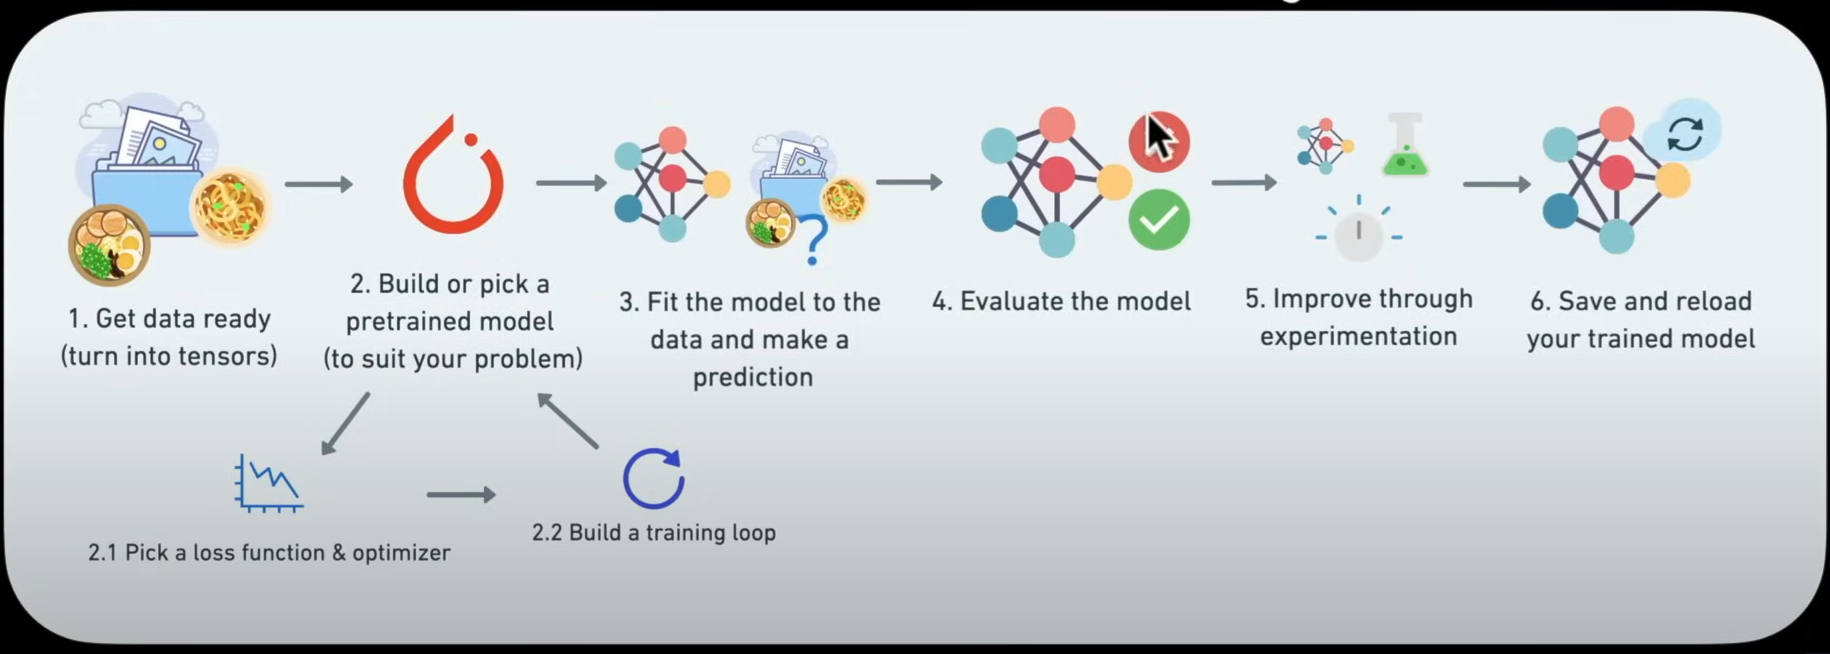

In [ ]:
what_were_covering = {1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [ ]:
import torch
from torch import nn #nn contains all of pytorch's building blocks for neural networks
import matplotlib.pyplot as plt


torch.__version__

'2.2.1+cu121'

##1. Data (preparing and loading)

Data can be almost anything like excel, images, words, videos etc...


Machine Learning is a game of 2 parts
1. Get data into numerical presentation
2. Build a model to learn patterns in that numerical represenatation

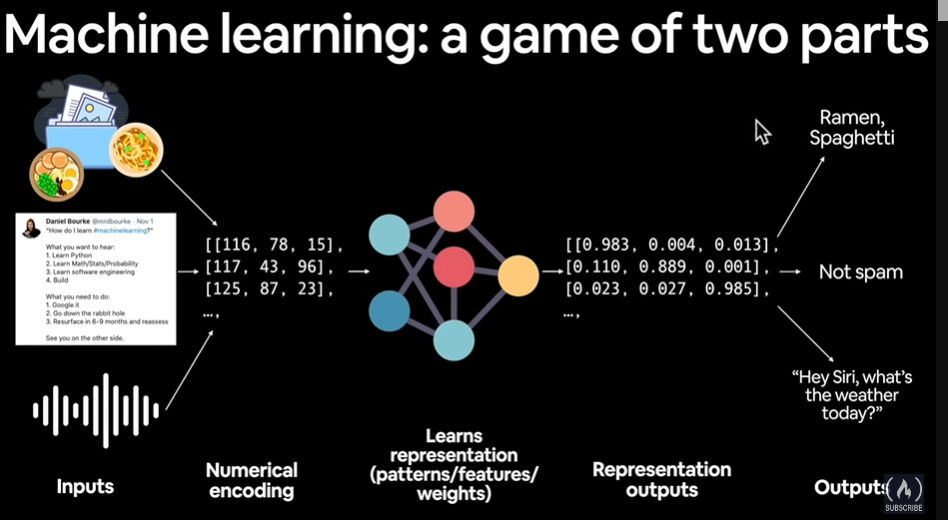

Lets create some known data using linear regression formula


In [ ]:
# Create *known* parameters for typical linear regression model

weight = 0.7
bias = 0.3

#we want to build a model that can estimate these numbers

start = 0
end = 1

step = 0.02

X = torch.arange(start,end,step).unsqueeze(dim=1)
y= weight*X + bias
X[:10],y[:10], len(X),len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

###Splitting data into train and test sets

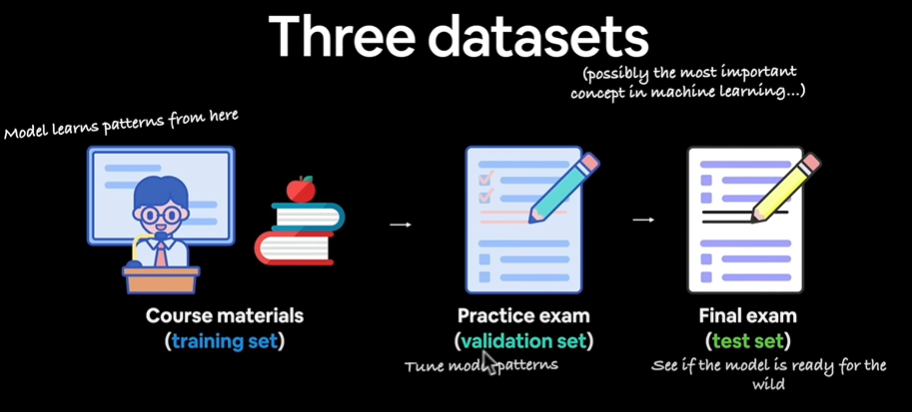


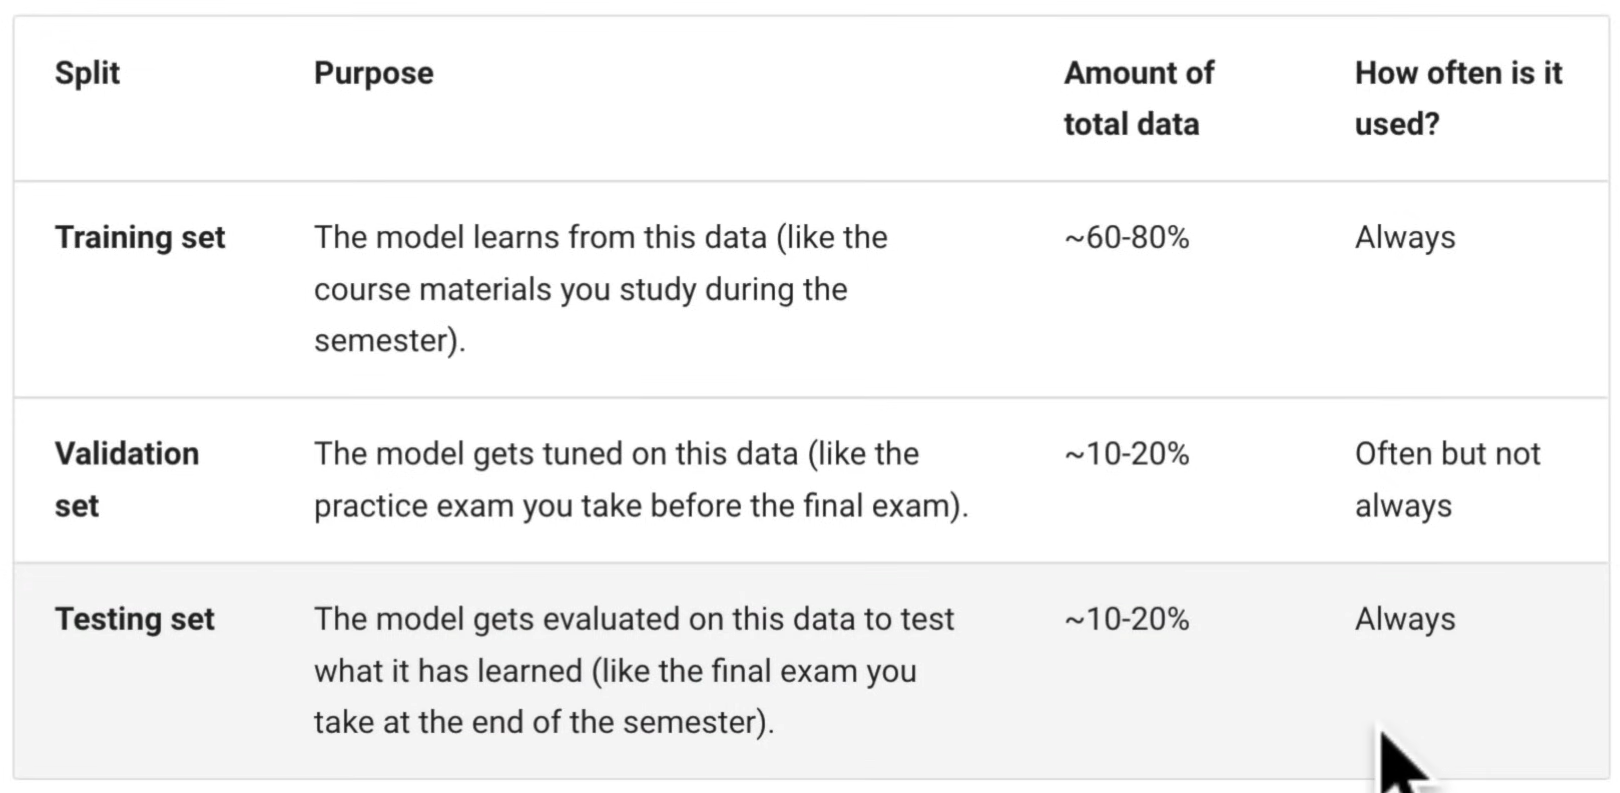

In [ ]:
#create a train test split

train_split = int(0.8*len(X))
X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test =  X[train_split:],y[train_split:]

len(X_train), len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

In [ ]:
def plot_predictions(train_data= X_train,
                     train_labels= y_train,
                     test_data= X_test,
                     test_labels= y_test,
                     predictions=None
                     ):
  """
  Plots training data and test data and compares predictions """

  plt.figure(figsize=(10,7))
  #plot the training data in blue
  plt.scatter(train_data,train_labels, c="b", s=4, label="Training data")
  #plot the training data in green
  plt.scatter(test_data,test_labels, c="g", s=4, label="Testing data")

  #are there predictions?
  if predictions is not None :
    plt.scatter(test_data,predictions,c="r", s=4, label="Predictions")

  #show the legend

  plt.legend(prop={"size":14});


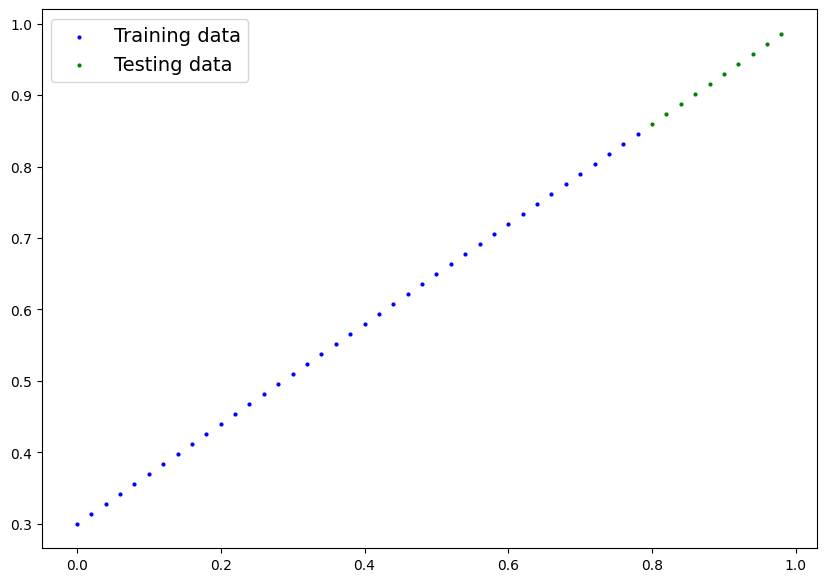

In [ ]:
plot_predictions()

## Build our pytorch model
Our first pytorch model (linear regression model)

We are using classes throughout the course, hence we need OOPs concepts in Python

what our model does:
* start with random values (weight and bias)
* Look at the training dat and adjust the random values to better represent or get closer to ideal values (so weight and bias are adjusted)

How does it do so?

through 2 main algorithms
1. Gradient Descent
2. Backpropagation

In [ ]:
# create a linear regression model class
from torch import nn

class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch inherits from nn.Module , sort of a parent class, its like lego building bricks of pytorch models
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.rand(1,requires_grad=True,dtype=torch.float))
    self.bias = nn.Parameter(torch.rand(1,requires_grad=True,dtype=torch.float))

    #Forward method to define the computation in the model
  def forward(self,x:torch.Tensor) -> torch.Tensor: # <- X is the input data
      return self.weights * x + self.bias
    #model parameters adjusted by gradient descent method







### PyTorch model building essentials

* torch.nn - contains all abuilding blocks for computational graphs /neural netwroks
* torch.nn.Parameters - what parameters should our model try and learn, often a pytorch layer from torch.nn will set these for us
* torch.nn.Module - The base class for all neural network modules, if you sub class it, we should override the forward method
* torch.optim - this is where optimizers live, they will help with gradient descent
* def forward() : all nn module sub classes required you to overwrite forward, this defines what happens in forward computation

### Checking the contents of our pytorch model

now we have created a model, let's see what is inside...


In [ ]:
#lets create a random_seed

RANDOM_SEED = 45
torch.manual_seed(RANDOM_SEED)

#create an instance of the model we created

model_0 = LinearRegressionModel()

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.1869], requires_grad=True),
 Parameter containing:
 tensor([0.9613], requires_grad=True)]

In [ ]:
# list named parameters

model_0.state_dict()

OrderedDict([('weights', tensor([0.1869])), ('bias', tensor([0.9613]))])

### making predictions using torch.inference_mode()

To check put models predictive power.let see how well it predicts yZ_test based on X_test

when we pass data through  our model. it runs it through the forward method

When we make predictions we use `torch.inference_mode()`

In [ ]:
with torch.inference_mode(): #this is a context manager
  y_preds = model_0(X_test)

y_preds

tensor([[0.8548],
        [0.8687],
        [0.8826],
        [0.8965],
        [0.9104],
        [0.9243],
        [0.9382],
        [0.9521],
        [0.9660],
        [0.9799]])

In [ ]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

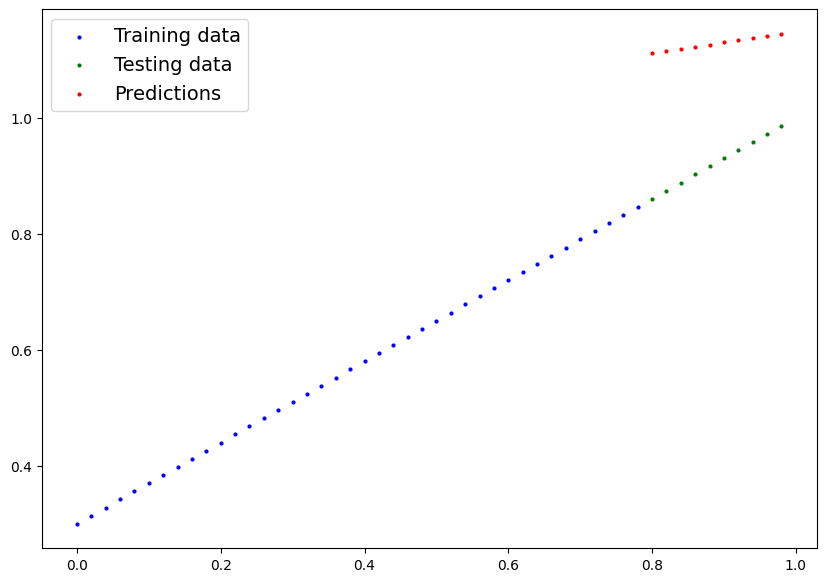

In [ ]:
plot_predictions(predictions=y_preds)

## Train Model

The whole idea odf training is for the model to move from unknown parameter (can be random) to known parameters

or in other words moving towards better representation of data

One way to measure to check how bad our predictions are using loss functions

Note : Loss function may be called cost function or criterion


we also need a optimiser : takes into account the loss and adjust the parameter accordingly (weights and bias)

Typically for pytorch model, we need:
* A training loop
* A testing loop

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.1869], requires_grad=True),
 Parameter containing:
 tensor([0.9613], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.1869])), ('bias', tensor([0.9613]))])

In [ ]:
# setup a loss function
loss_fn = nn.L1Loss()

# setup an optimiser
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01
                            )


# Building a Training loop and testing loop in pytorch

A couple of things we need in training loop is

0. loop through the data
1. Forward pass (this involves data moving through our model's `forward()` functions) to make predictions (also called forward propagation)
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward - moves backwards through the network to calculate the gradients of each of the parameters w.r.to to loss (`back propagation`)
5. Optimizer step - use the optimser to adjust the parameters to try and improve the loss (`gradient descent`)

In [ ]:
with torch.no_grad():
  list(model_0.parameters())


In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.1869], requires_grad=True),
 Parameter containing:
 tensor([0.9613], requires_grad=True)]

In [ ]:
torch.manual_seed(RANDOM_SEED)
# an epoch is one loop through the data
epochs = 1000

#track the following values
epoch_count =[]
loss_values=[]
test_loss_values=[]

for epoch in range(epochs):
  model_0.train() # train mode in torch sets all parameters that requires gradient to require gradients

  #forward pass
  y_pred = model_0(X_train)

  #calculate the loss function
  loss = loss_fn(y_pred,y_train)
  print(f"Loss: {loss}")

  # optimiser zero grad
  optimizer.zero_grad()

  # perform back propagation on the loss w.r.to parameters of the model
  loss.backward()

  #set the optimiser
  optimizer.step()

  #testing code
  model_0.eval() # turns off the diffferent settings in model not needed for evaluation/testing()

  with torch.inference_mode(): # turns of grads and some more things

  # here also we forward pass
    test_pred = model_0(X_test)

  #calculate test loss
    test_loss = loss_fn(test_pred,y_test)

  if epoch % 100 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch : {epoch} | Loss : {loss} | Test loss : {test_loss}")

    print(model_0.state_dict())

Loss: 0.46123790740966797
Epoch : 0 | Loss : 0.46123790740966797 | Test loss : 0.19124069809913635
OrderedDict([('weights', tensor([0.1830])), ('bias', tensor([0.9513]))])
Loss: 0.4497168958187103
Loss: 0.43819594383239746
Loss: 0.4266749322414398
Loss: 0.4151539206504822
Loss: 0.4036329686641693
Loss: 0.39211195707321167
Loss: 0.3805909752845764
Loss: 0.3690699636936188
Loss: 0.3575490117073059
Loss: 0.34602800011634827
Loss: 0.334507018327713
Loss: 0.32298600673675537
Loss: 0.31146499514579773
Loss: 0.2999440133571625
Loss: 0.28842300176620483
Loss: 0.2769020199775696
Loss: 0.2653810381889343
Loss: 0.2538600564002991
Loss: 0.24233905971050262
Loss: 0.23081807792186737
Loss: 0.21997559070587158
Loss: 0.21090850234031677
Loss: 0.2029217779636383
Loss: 0.19539830088615417
Loss: 0.18876592814922333
Loss: 0.18290303647518158
Loss: 0.1777106672525406
Loss: 0.17290543019771576
Loss: 0.168634831905365
Loss: 0.16492247581481934
Loss: 0.16140784323215485
Loss: 0.15832659602165222
Loss: 0.15542

In [ ]:
loss_values

[tensor(0.4612, grad_fn=<MeanBackward0>),
 tensor(0.1094, grad_fn=<MeanBackward0>),
 tensor(0.0749, grad_fn=<MeanBackward0>),
 tensor(0.0406, grad_fn=<MeanBackward0>),
 tensor(0.0062, grad_fn=<MeanBackward0>),
 tensor(0.0032, grad_fn=<MeanBackward0>),
 tensor(0.0032, grad_fn=<MeanBackward0>),
 tensor(0.0032, grad_fn=<MeanBackward0>),
 tensor(0.0032, grad_fn=<MeanBackward0>),
 tensor(0.0032, grad_fn=<MeanBackward0>)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6949])), ('bias', tensor([0.2988]))])

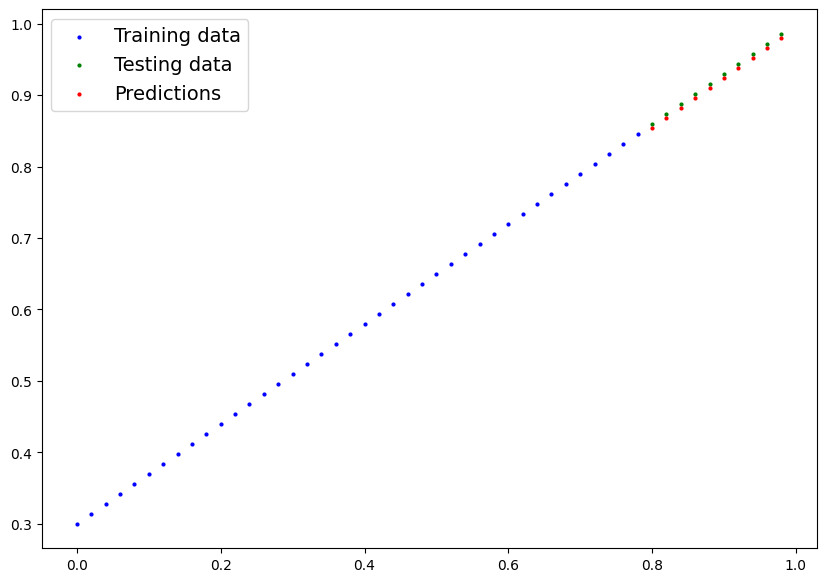

In [ ]:
with torch.inference_mode(): #this is a context manager
  y_preds_new = model_0(X_test)

plot_predictions(predictions=y_preds)

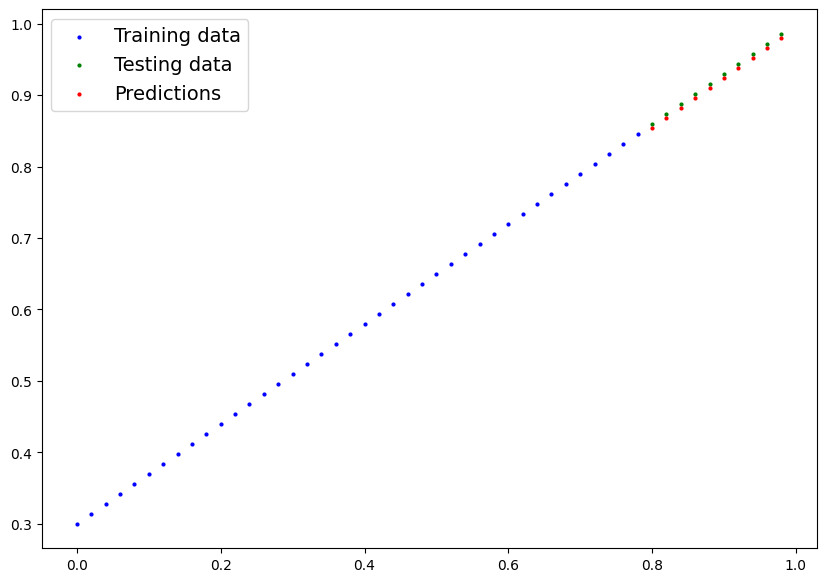

In [ ]:
plot_predictions(predictions=y_preds_new)

In [ ]:
import numpy as np

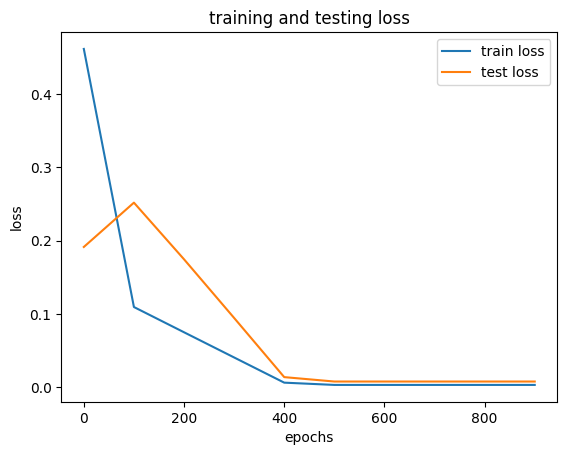

In [ ]:
#Plot the loss curves

plt.plot(epoch_count,np.array(torch.tensor(loss_values).numpy()),label="train loss")
plt.plot(epoch_count,np.array(torch.tensor(test_loss_values).numpy()),label="test loss")
plt.title("training and testing loss")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend();

## Saving the trained pytorch model

There are 3 main methods we should know about saving and loading models in pytorch

1. `torch.save()` - this allow you to save pytorch object in pickel format

2. `torch.load()` allows you to load saved model
3. `torch.nn.Module.load_state_dict()` this allows to load a models saved state dictionary


In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6949])), ('bias', tensor([0.2988]))])

In [ ]:
#saving our pytorch model

from pathlib import Path

#1.create a model directory

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok = True)

#2. Create model save path

MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

#3. save the model state_dict
print(f"Saving model to : {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)

Saving model to : models/01_pytorch_workflow_model_0.pth


In [ ]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1680 Mar 28 19:51 01_pytorch_workflow_model_0.pth


##Loading PyTorch model

Since we saved our model's `state dict()` rather the entire model, we will create the new instance of our model and load the saved `state_dict()` into that


In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6949])), ('bias', tensor([0.2988]))])

In [ ]:
#to load in a saved state_dict we have to instantiate a new instance of our model

loaded_model_0 = LinearRegressionModel()

#load saved model state dict of model_0
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6949])), ('bias', tensor([0.2988]))])

In [ ]:
#Make some predictions with the loaded model

loaded_model_0.eval()

with torch.inference_mode():
  loaded_model_preds =loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8548],
        [0.8687],
        [0.8826],
        [0.8965],
        [0.9104],
        [0.9243],
        [0.9382],
        [0.9521],
        [0.9660],
        [0.9799]])

In [ ]:
#compare loaded with original

y_preds_new==loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

##6. Putting it all together

Lets go back through everything we have built and see it all in one place

In [ ]:
import torch
from torch import nn
import numpy as np

#check version
torch.__version__

'2.2.1+cu121'

check if gpu exist or not, if it exists use gpu else use cpu

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

##6.2 Build a linear model using pytorch

In [ ]:
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    #use nn.Linear() for creating the model parameters
    self.linear_layer = nn.Linear(in_features=1,out_features=1)

  def forward(self,x:torch.Tensor)->torch.Tensor:
    return self.linear_layer(x)

In [ ]:
model_1 = LinearRegressionModelV2()
model_1,model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.5723]])),
              ('linear_layer.bias', tensor([-0.8868]))]))

In [ ]:
#check the device
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
#set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device


device(type='cpu')